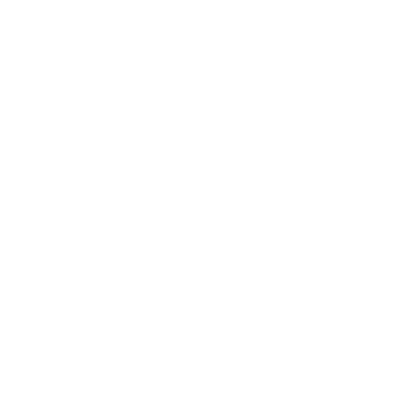

In [13]:
from PIL import Image
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/CS419/perfectly_painted_cat.png'
binary_image = Image.open(image_path)

# Convert the image to fit in algorithm
binary_image = binary_image.convert('L')  # Convert to grayscale
binary_array = np.array(binary_image)

# Morphological Convex Hull Algorithm using the Hit-or-Miss Transformation

def hit_or_miss(binary_image, struct_element):
    """
    Perform the hit-or-miss operation on a binary image using a structuring element.
    """
    (n, m) = struct_element.shape
    result = np.ones_like(binary_image)
    padded_image = np.pad(binary_image, ((n//2, n//2), (m//2, m//2)), mode='constant', constant_values=0)

    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            region = padded_image[i:i+n, j:j+m]
            if (region == struct_element).all():
                result[i, j] = 0
    return result

def morphological_convex_hull(binary_image):
    """
    Compute the morphological convex hull of a binary image.
    """
    struct_elements = [
        np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]]),  # Top
        np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]]),  # Bottom
        np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]]),  # Right
        np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]])   # Left
    ]

    hull = binary_image.copy() # Created to check difference
    changes = True

    while changes:
        changes = False
        for se in struct_elements:
            hit_miss_result = hit_or_miss(hull, se)
            union = np.logical_or(hull, hit_miss_result)
            if not np.array_equal(union, hull):
                changes = True
                hull = union
    return hull

# Apply the morphological convex hull algorithm
convex_hull_array = morphological_convex_hull(binary_array)

# Convert the result back to an image
convex_hull_image = Image.fromarray((convex_hull_array * 255).astype(np.uint8))

# Display the image
convex_hull_image
